In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train= pd.read_csv('/content/drive/MyDrive/Coders_cave/diabetes.csv')
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
y= train['Outcome']
x= train.drop(['Outcome','BloodPressure','SkinThickness'], axis=1)

In [46]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [47]:
x.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [48]:
correlation_matrix= train.corr()

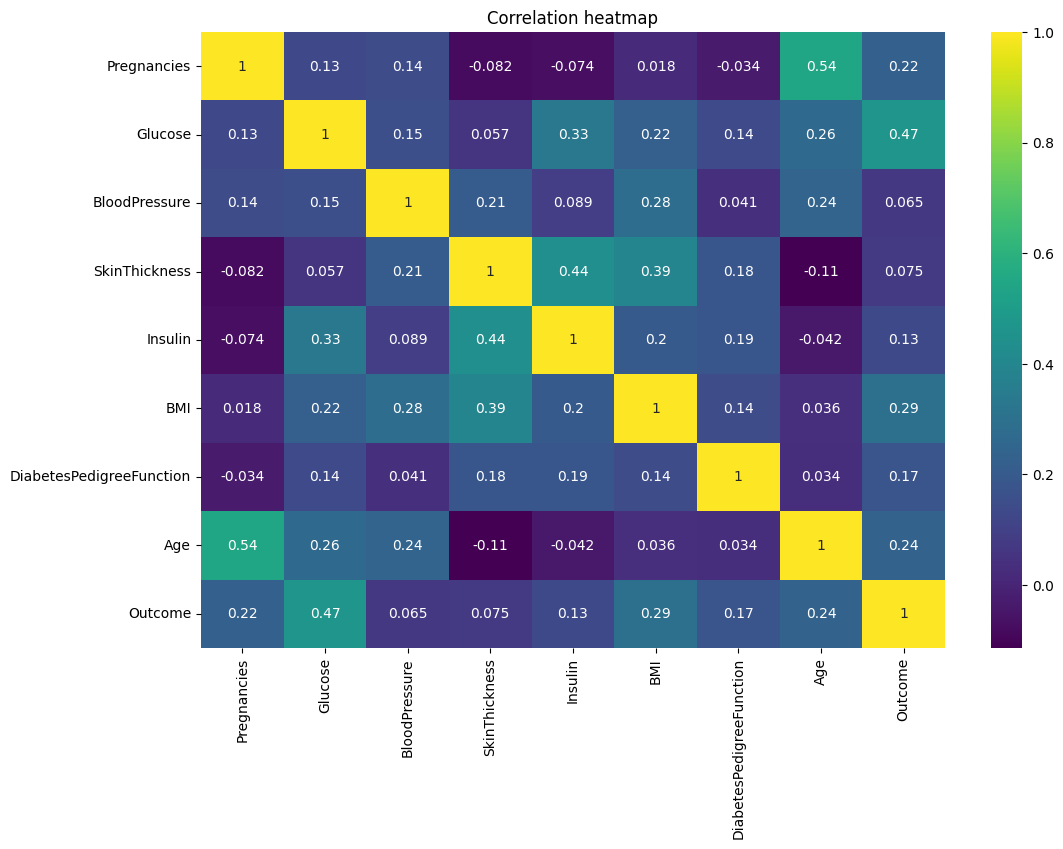

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation heatmap")
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
Scaler= MinMaxScaler()
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1244)
Scale_x_train= Scaler.fit_transform(x_train)
Scale_x_test= Scaler.transform(x_test)

In [58]:
accuracy_list= []

In [60]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=1000,verbose=1)
lr.fit(Scale_x_train, y_train)

prediction= lr.predict(Scale_x_test)
accuracy= accuracy_score(y_test,prediction)
print(accuracy)
accuracy_list.append(['Log regression',accuracy])

0.7597402597402597


In [61]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(Scale_x_train, y_train)

prediction= dtc.predict(Scale_x_test)
accuracy= accuracy_score(y_test,prediction)
print(accuracy)
accuracy_list.append(['Decision Tree',accuracy])

0.7077922077922078


In [69]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(Scale_x_train, y_train)

prediction= rfc.predict(Scale_x_test)
accuracy= accuracy_score(y_test,prediction)
print(accuracy)
accuracy_list.append(['Random Forest',accuracy])

0.7207792207792207


In [75]:
#k neighbours
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(Scale_x_train, y_train)

prediction= knn.predict(Scale_x_test)
accuracy= accuracy_score(y_test,prediction)
print(accuracy)
accuracy_list.append(['Knn',accuracy])

0.7272727272727273


In [76]:
#SVC
from sklearn.svm import SVC
svc= SVC()
svc.fit(Scale_x_train, y_train)

prediction= svc.predict(Scale_x_test)
accuracy= accuracy_score(y_test,prediction)
print(accuracy)
accuracy_list.append(['SVC',accuracy])

0.7467532467532467


In [77]:
print('Accuracy')
for i in accuracy_list:
  print(i[0],'--->',i[1])

Accuracy
Log regression ---> 0.7597402597402597
Decision Tree ---> 0.7077922077922078
Random Forest ---> 0.7207792207792207
Knn ---> 0.7272727272727273
SVC ---> 0.7467532467532467
